<a href="https://colab.research.google.com/github/SciSan3631/mBRSET/blob/main/learningmodel_artifactprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow opencv-python matplotlib


In [2]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
accelerate                       0.32.1
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.15.0
backcall                         0.2.0
beautifulsoup4                   4.12.3

In [3]:
import tensorflow as tf
import os
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [55]:

tf.config.list_physical_devices('GPU')



[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Removeing Faulty Images

In [12]:
import cv2
import imghdr

In [13]:
data_dir ='data'

In [14]:
os.listdir(data_dir)

['no_artifact_training', 'yes_artifact_training', '.ipynb_checkpoints']

In [17]:
image_exts = ['jpeg','jpg','bmp','png']

In [18]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
      print(image)

1006.1.jpg
1014.4.jpg
1015.1.jpg
1015.3.jpg
1008.2.jpg
1014.2.jpg
1008.1.jpg
1015.4.jpg
red.png
1012.3.jpg
1007.4.jpg
10.2.jpg
1012.2.jpg
1002.3.jpg
1016.1.jpg
1.2.jpg
1.3.jpg
10.1.jpg
1.1.jpg
10.3.jpg
1.4.jpg
100.1.jpg
1000.2.jpg
10.4.jpg


In [21]:
img =cv2.imread(os.path.join('data','no_artifact_training','red.png'))

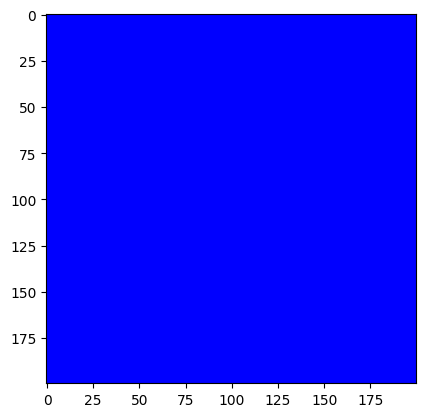

In [22]:
plt.imshow(img)
plt.show()

In [23]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [24]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
      print(image)

1006.1.jpg
1014.4.jpg
1015.1.jpg
1015.3.jpg
1008.2.jpg
1014.2.jpg
1008.1.jpg
1015.4.jpg
red.png
1012.3.jpg
1007.4.jpg
10.2.jpg
1012.2.jpg
1002.3.jpg
1016.1.jpg
1.2.jpg
1.3.jpg
10.1.jpg
1.1.jpg
10.3.jpg
1.4.jpg
100.1.jpg
1000.2.jpg
10.4.jpg


Loading the Data

In [26]:
import numpy as np
from matplotlib import pyplot as plt

In [29]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 24 files belonging to 2 classes.
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorSliceDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op TensorSliceDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Equal in device /job:localhost/replica:0/task:

In [30]:
data_iterator = data.as_numpy_iterator()

Executing op AnonymousIteratorV3 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MakeIterator in device /job:localhost/replica:0/task:0/device:CPU:0


In [31]:
batch = data_iterator.next()

Executing op IteratorGetNext in device /job:localhost/replica:0/task:0/device:CPU:0


In [44]:
batch[0].shape


(24, 256, 256, 3)

In [45]:
batch[1]

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0], dtype=int32)

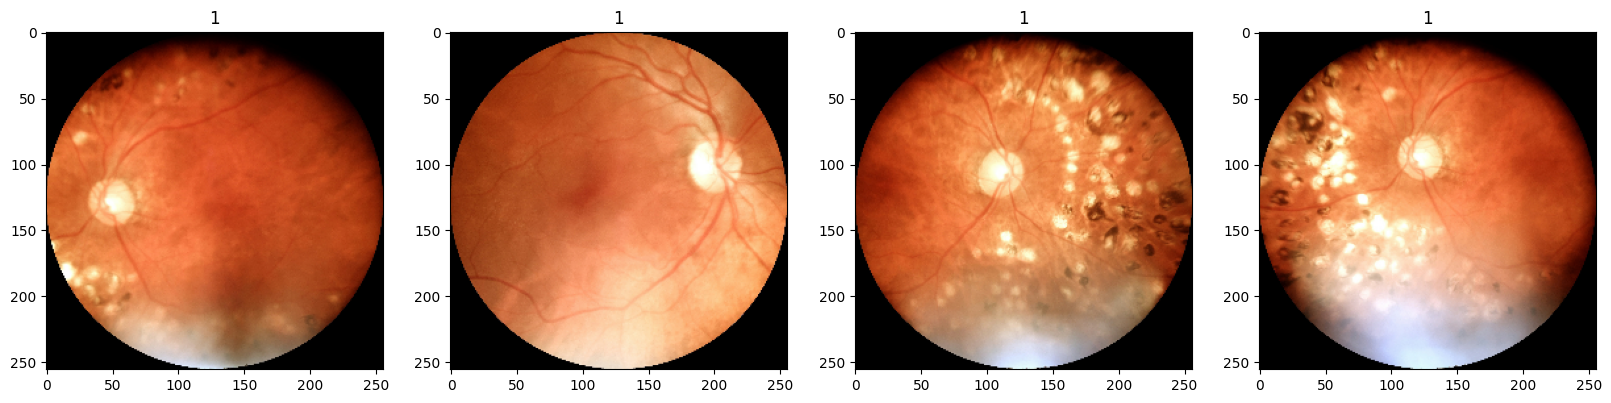

In [33]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

array([[[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       ...,

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]]], dtype=uint8)
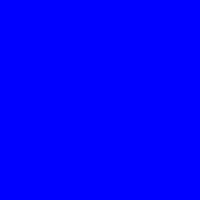

In [34]:
cv2.imread(os.path.join("data",'no_artifact_training','red.png'))

Scale Data